<a href="https://colab.research.google.com/github/bappy15010/Brain-Tumor-Detection/blob/master/_mat_to_jpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive') 

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

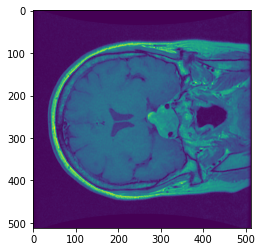

3.0


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from PIL import Image

#reading v 7.3 mat file in python
#https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python
filepath = '/content/drive/My Drive/Brain_MRI2/BRAIN_DATA/1508.mat';
f = h5py.File(filepath, 'r') #Open mat file for reading|
cjdata = f['cjdata'] #<HDF5 group "/cjdata" (5 members)>
image = np.array(cjdata.get('image')).astype(np.float64) #In MATLAB: image = cjdata.image
label = cjdata.get('label')[0,0] #Use [0,0] indexing in order to convert lable to scalar
PID = cjdata.get('PID') # <HDF5 dataset "PID": shape (6, 1), type "<u2">
PID = ''.join(chr(c) for c in PID) #Convert to string https://stackoverflow.com/questions/12036304/loading-hdf5-matlab-strings-into-python
tumorBorder = np.array(cjdata.get('tumorBorder'))[0] #Use [0] indexing - convert from 2D array to 1D array.
tumorMask = np.array(cjdata.get('tumorMask'))
f.close()
hi = np.max(image)
lo = np.min(image)
image = (((image - lo)/(hi-lo))*255).astype(np.uint8)
#Save as jpeg
#https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image
im = Image.fromarray(image)
im.save("/content/drive/My Drive/Brain_MRI4/1508.jpg")
#Display image for testing
imgplot = plt.imshow(image)
plt.show()
print(label)